# Lesson 2: Basics of Data Analysis

## Section 1: Introduction to Random Variables

In [130]:
# A random variable (r.v.) is a function X: Ω → R, where Ω is the state space and R is the set of values (Range).

# Example of Numerical and Categorical Variables
import pandas as pd

age = [25, 26, 22, 23]
height = [172, 167, 170, 160]
degree_level = ['Master', 'Master', 'Bachelor', 'Bachelor']

# create a dataframe
df = pd.DataFrame({'age': age, 'height': height, 'degree_level': degree_level})

# lenght dataframe
print("LENGHT", len(df))

# print the dataframe
df

LENGHT 4


,age,height,degree_level
0,25,172,Master
1,26,167,Master
2,22,170,Bachelor
3,23,160,Bachelor


In [131]:
print("Numerical Data:")
print(df['age'])
print(df['height'])

print("\nCategorical Data:")
print(df['degree_level'])

Numerical Data:
0    25
1    26
2    22
3    23
Name: age, dtype: int64
0    172
1    167
2    170
3    160
Name: height, dtype: int64

Categorical Data:
0      Master
1      Master
2    Bachelor
3    Bachelor
Name: degree_level, dtype: object


In [132]:
print("Frequency of each categorical value:\n", df['degree_level'].value_counts())

Frequency of each categorical value:
 degree_level
Master      2
Bachelor    2
Name: count, dtype: int64


## Section 2: Data Cleaning


In [141]:
raw_data = {
    'Age': [80, 26, 22, 23],
    'Height': [172, 167, 170, None],
    'Degree_Level': ['Master', 'University', 'Bachelor', None]
}
df = pd.DataFrame(raw_data)
df

,Age,Height,Degree_Level
0,80,172.0,Master
1,26,167.0,University
2,22,170.0,Bachelor
3,23,NaN,None


### Identifying Missing Values

In [143]:
print("\nMissing Values:")
print(df.isnull().sum()) # one missing value in "Height" and "Degree_Level"


Missing Values:
Age             0
Height          1
Degree_Level    1
dtype: int64


### Handling Missing Values


In [144]:
# MEAN
mean = sum(df['Height'].dropna())/len(df.dropna()) # or mean = df['Height'].mean()

mean = int(mean)
print("Mean: ", mean)

df['Height'] = df['Height'].fillna(mean)
df['Height']

Mean:  169


,Height
0,172.0
1,167.0
2,170.0
3,169.0


In [145]:
# reset
df = pd.DataFrame(raw_data)

In [146]:
# MEDIAN
sorted_height = sorted(df['Height'].dropna().values)
print(sorted_height)

middle_value = len(df.dropna()) // 2  # or int(len(df) / 2 )
median = sorted_height[middle_value] # or median = df['Height'].median()

print("Median: ", median)

df['Height'] = df['Height'].fillna(median)
df['Height']

[167.0, 170.0, 172.0]
Median:  170.0


,Height
0,172.0
1,167.0
2,170.0
3,170.0


In [147]:
# MODE
print(df['Degree_Level'].value_counts(), "\n\n")

vals = df['Degree_Level'].value_counts().values.tolist()
keys = df['Degree_Level'].value_counts().keys().tolist()

print("Values:", vals)
print("Keys:", keys)

print("Max value: ", max(vals), "\n")

# get index of max value
idx = vals.index(max(vals))
mode = keys[idx] # or df['Degree_Level'].mode()
print("Highes occurring variable: ", mode)

df['Degree_Level'] = df['Degree_Level'].fillna(mode)
df['Degree_Level']

Degree_Level
Master        1
University    1
Bachelor      1
Name: count, dtype: int64 


Values: [1, 1, 1]
Keys: ['Master', 'University', 'Bachelor']
Max value:  1 

Highes occurring variable:  Master


,Degree_Level
0,Master
1,University
2,Bachelor
3,Master


### Identifying Outliers

In [148]:
# using IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR, "\n")


outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)

IQR:  16.75 

Outliers:
   Age  Height Degree_Level
0   80   172.0       Master


In [149]:
import numpy as np

# Calculate z-scores for 'Age'
df['zscore'] = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())

# Identify outliers based on a z-score threshold (e.g., 1)
outliers_zscore = df[df['zscore'] > 1]

df.drop('zscore', axis=1, inplace=True)

print("Outliers based on Z-score:")
outliers_zscore

Outliers based on Z-score:


,Age,Height,Degree_Level,zscore
0,80,172.0,Master,1.497276


## Section 3: Statistical Techniques


In [150]:
# Calculating Mean, Median, and Mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_degree = df['Degree_Level'].mode()[0]

print("\nStatistics:")
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Degree Level: {mode_degree}")


Statistics:
Mean Age: 37.75
Median Age: 24.5
Mode Degree Level: Master


## Section 4: Categorical Variable Encoding


### One-Hot Encoding

In [151]:
encoded_data = pd.get_dummies(df, columns=['Degree_Level'], drop_first=True)
print("\nOne-Hot Encoded Data:")
print(encoded_data)


One-Hot Encoded Data:
   Age  Height  Degree_Level_Master  Degree_Level_University
0   80   172.0                 True                    False
1   26   167.0                False                     True
2   22   170.0                False                    False
3   23   170.0                 True                    False


### Label Encoding

In [152]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Degree_Level'] = label_encoder.fit_transform(df['Degree_Level'])

print("\nLabel Encoded Data:")
print(df)


Label Encoded Data:
   Age  Height  Degree_Level
0   80   172.0             1
1   26   167.0             2
2   22   170.0             0
3   23   170.0             1


## Section 5: Visualization Example

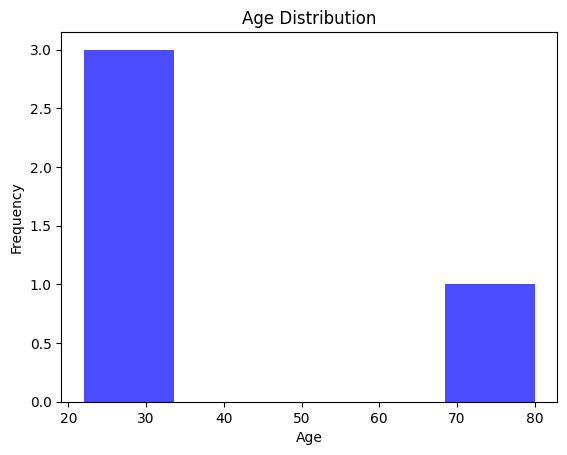

In [153]:
# Visualizing Age Distribution
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=5, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()